In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns

data = pd.read_csv(r'C:\Users\Kerry\Sales Data.csv')
print(data.shape)
data.head()

(185950, 13)


,Unnamed: 0,Order ID,Product Category,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Time of Day
0,0,295665,Laptops and Computers,Macbook Pro Laptop,1,1700.00,30-12-2019 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,Night
1,1,295666,Home Appliances,LG Washing Machine,1,600.00,29-12-2019 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,Morning
2,2,295667,Charging Cables,USB-C Charging Cable,1,11.95,12-12-2019 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,Evening
3,3,295668,Monitors,27in FHD Monitor,1,149.99,22-12-2019 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,Afternoon
4,4,295669,Charging Cables,USB-C Charging Cable,1,11.95,18-12-2019 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,Afternoon


### Calculating the accuracy

In [2]:
X = data.iloc[:,[4,5,8,9,11]].values
y = data.iloc[:,11].values

In [3]:
y

array([ 0,  7, 18, ..., 18, 18, 14], dtype=int64)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [7]:
classifier=LogisticRegression(random_state=42, max_iter=1000, solver='saga')
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='saga')

In [8]:
y_pred=classifier.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score

In [10]:
accuracy_score(y_test, y_pred)

0.9560903468674374

### Performing linear regression

In [11]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [12]:
y_pred = regressor.predict(X_test)


### Mean squared error

In [13]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse **(1/2)
r2_score = regressor.score(X_test, y_test)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2_score}")
                

Mean Squared Error: 1.682137594959738e-28
R-squared Score: 1.0


In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
features = ["Quantity Ordered", "Price Each", "Month", "Sales", "Hour"]
target = "Product Category"

In [16]:
# Encode target labels
label_encoder = LabelEncoder()
data[target] = label_encoder.fit_transform(data[target])

# Train decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       781
           1       1.00      1.00      1.00       439
           2       1.00      1.00      1.00       259
           3       1.00      1.00      1.00       185
           4       1.00      1.00      1.00       168
           5       1.00      1.00      1.00       263
           6       1.00      1.00      1.00       501
           7       1.00      1.00      1.00       818
           8       1.00      1.00      1.00      1235
           9       1.00      1.00      1.00      1733
          10       1.00      1.00      1.00      2135
          11       1.00      1.00      1.00      2484
          12       1.00      1.00      1.00      2517
          13       1.00      1.00      1.00      2453
          14       1.00      1.00      1.00      2178
          15       1.00      1.00      1.00      1988
          16       1.00      1.00      

In [17]:
print("Classes in label encoder:", label_encoder.classes_)
print("Classes in model:", clf.classes_)


Classes in label encoder: ['Audio Devices' 'Batterie' 'Charging Cables' 'Entertainment Devices'
 'Home Appliances' 'Laptops and Computers' 'Monitors'
 'Phones and Accessories']
Classes in model: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


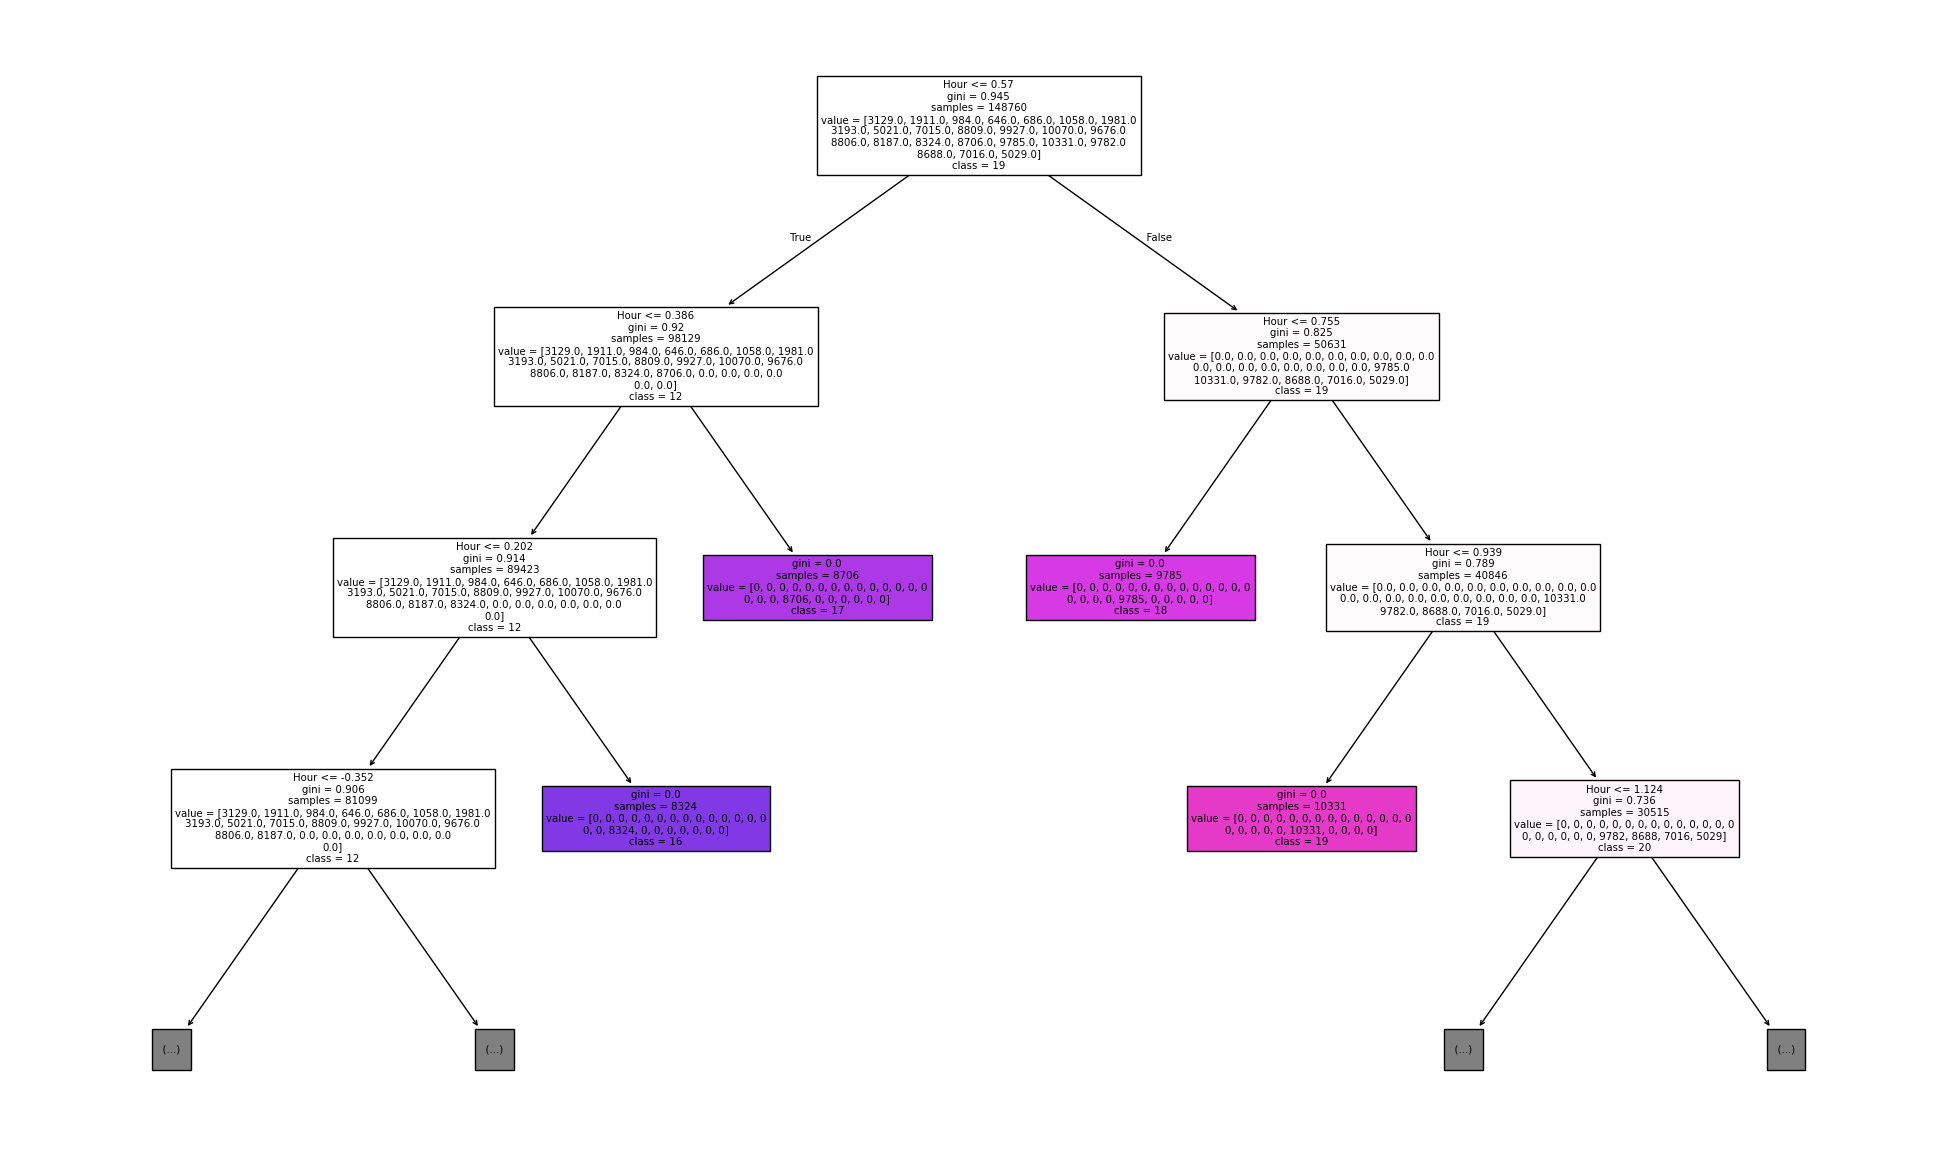

In [18]:
# Visualising the decision tree
plt.figure(figsize=(25, 15))
plot_tree(clf, feature_names=features, class_names=[str(c) for c in clf.classes_], filled=True, max_depth=3)
plt.show()

In [19]:
from sklearn.ensemble import RandomForestRegressor

### Dropping unnecessary columns

In [20]:
data = data.drop(columns=["Unnamed: 0", "Order ID", "Order Date", "Purchase Address"])

### Categorising variables

In [21]:
label_encoders = {}
categorical_columns = ["Product Category", "Product", "City", "Time of Day"]
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

### Define features and target variable

In [22]:
X = data.drop(columns=["Sales"])
y = data["Sales"]

### Training the random forest model and making predictions

In [23]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 0.0
Root Mean Squared Error (RMSE): 0.0


In [25]:
importances = rf_model.feature_importances_
feature_names = np.array(X.columns)
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_features = feature_names[sorted_indices]

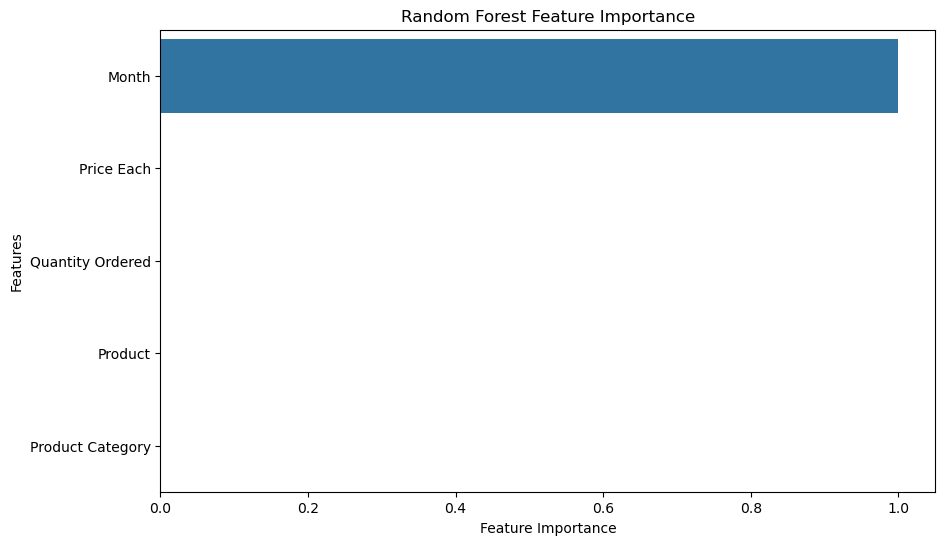

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances, y=sorted_features)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()

### KNN Algorithm Supervised-Classification

In [27]:
from sklearn.neighbors import KNeighborsClassifier


In [28]:
# Drop unnecessary columns
df = data.drop(columns=["Unnamed: 0", "Order ID", "Order Date", "Purchase Address", "Product"], errors='ignore')


# Encode categorical variables
label_encoders = {}
categorical_columns = ["City", "Time of Day"]

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Encode target variable ("Product Category")
target_encoder = LabelEncoder()
df["Product Category"] = target_encoder.fit_transform(df["Product Category"])

# Split features and target
X = data.drop(columns=["Product Category"])
y = data["Product Category"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=[str(cls) for cls in target_encoder.classes_])

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.9944
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9551
           1       1.00      1.00      1.00      8244
           2       1.00      1.00      1.00      8712
           3       1.00      0.99      1.00       960
           4       0.98      0.47      0.64       263
           5       1.00      1.00      1.00      1770
           6       1.00      1.00      1.00      4804
           7       0.95      1.00      0.98      2886

    accuracy                           0.99     37190
   macro avg       0.99      0.93      0.95     37190
weighted avg       0.99      0.99      0.99     37190



### KMeans Clustering Unsupervised-Clustering

In [29]:
from sklearn.cluster import KMeans

In [30]:
kmeans = KMeans(n_clusters=5, n_init=10)

In [31]:
print(data.isnull().sum())

Product Category    0
Product             0
Quantity Ordered    0
Price Each          0
Month               0
Sales               0
City                0
Hour                0
Time of Day         0
dtype: int64


In [33]:
kmeans.fit(data)

KMeans(n_clusters=5, n_init=10)

In [34]:
data['cluster'] = kmeans.labels_

In [35]:
kmeans.cluster_centers_

array([[1.23807411e+00, 1.05627767e+01, 1.21936890e+00, 9.19010428e+00,
        7.07340273e+00, 1.04082833e+01, 4.52840509e+00, 1.44178428e+01,
        9.94308371e-01],
       [6.31502242e+00, 1.37077915e+01, 1.00274664e+00, 7.30440494e+02,
        6.96900224e+00, 7.31707293e+02, 4.52460762e+00, 1.44302130e+01,
        9.91479821e-01],
       [5.00000000e+00, 1.30004232e+01, 1.00126957e+00, 1.69970376e+03,
        7.10093102e+00, 1.70156580e+03, 4.53914515e+00, 1.44506983e+01,
        9.86457893e-01],
       [5.35848664e+00, 4.99443925e+00, 1.00109136e+00, 3.65398930e+02,
        7.07062675e+00, 3.65710748e+02, 4.53294876e+00, 1.44384679e+01,
        9.87527284e-01],
       [1.72051086e+00, 4.97954596e+00, 1.00773202e+00, 1.29483231e+02,
        7.05199970e+00, 1.30452277e+02, 4.54509523e+00, 1.43779057e+01,
        9.94021887e-01]])

In [36]:
print (kmeans.labels_)
print (len(kmeans.labels_))

[2 1 0 ... 0 0 0]
185950


In [37]:
print (type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 103661, 1: 17840, 2: 4726, 3: 19242, 4: 40481}


In [39]:
print("data shape:", data.shape)
print("kmeans.labels_ length:", len(kmeans.labels_))
print("First few rows of data:\n", data.head())
print("First few cluster labels:", kmeans.labels_[:10])

data shape: (185950, 10)
kmeans.labels_ length: 185950
First few rows of data:
    Product Category  Product  Quantity Ordered  Price Each  Month    Sales  \
0                 5       13                 1     1700.00     12  1700.00   
1                 4       11                 1      600.00     12   600.00   
2                 2       15                 1       11.95     12    11.95   
3                 6        2                 1      149.99     12   149.99   
4                 2       15                 1       11.95     12    11.95   

   City  Hour  Time of Day  cluster  
0     5     0            3        2  
1     5     7            2        1  
2     5    18            1        0  
3     7    15            0        4  
4     0    12            0        0  
First few cluster labels: [2 1 0 4 0 0 0 0 4 0]


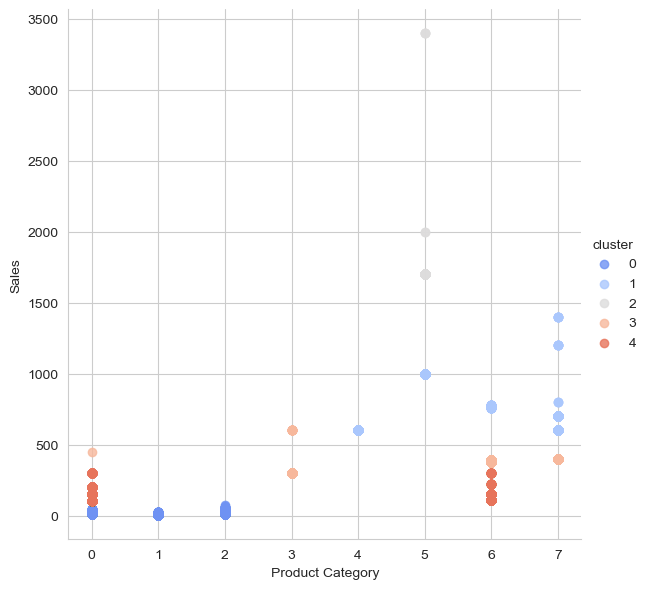

In [42]:
#Plotting the data
data['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot(x='Product Category', y='Sales',
           data=data, hue='cluster',
           palette='coolwarm', height=6, aspect=1, fit_reg=False)
plt.show()